# ECO462: Homework 3

In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Section A

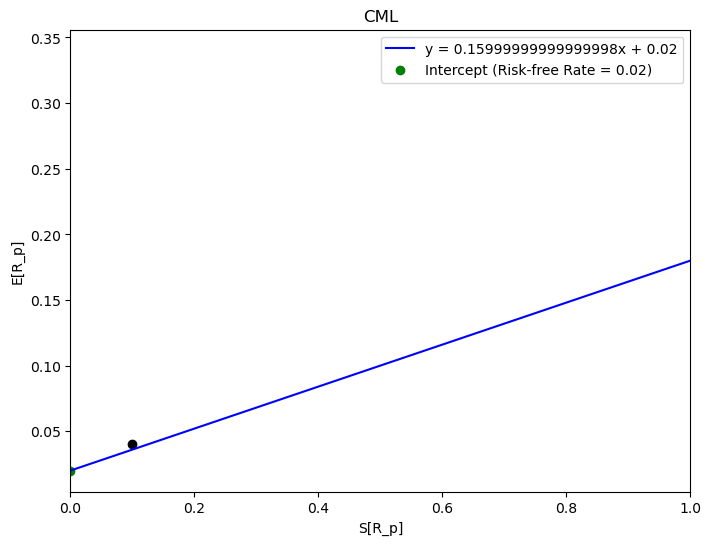

In [2]:
# Question A1 & A3 Coding Portion

r_rf = 0.02
r_m = 0.06
sigma_m = 0.25

slope = (r_m - r_rf)/sigma_m
intercept = r_rf

def CML(x):
  return slope * x + intercept

x = np.linspace(0, 2, 100)
y = CML(x)

x_intercept = 0

plt.figure(figsize=(8,6))
plt.plot(x, y, label=f"y = {slope}x + {intercept}", color='blue')
plt.scatter(x_intercept, r_rf, color="green", label=f"Intercept (Risk-free Rate = {r_rf})")
plt.scatter(.1,.04, color="black")
plt.xlabel("S[R_p]")
plt.xlim(0, 1)
plt.ylabel("E[R_p]")
plt.title("CML")
plt.legend()
plt.show()

### Question A1 Written Portion

The Capital Market Line (CML) is derived from the given data where the risk-free rate ($r_f$) is $2\%$ and the market portfolio's expected return ($E(R_M)$) is $6\%$ with a standard deviation ($\sigma_M$) of $25\%$. The intercept of the CML is the risk-free rate, $r_f=2\%$. The slope is the market's Sharpe Ratio, calculated as $\frac{E(R_M) - r_f}{\sigma_M} = \frac{6\% - 2\%}{25\%} = \frac{4\%}{25\%} = 0.16$. The equation for the CML, relating portfolio expected return $E(R_p)$ to portfolio standard deviation $\sigma_p$, is: $E(R_p) = 2\% + 0.16 \times \sigma_p$. The CML starts at $2\%$ on the expected return axis (where $\sigma_p=0$) and increases linearly with a slope of $0.16$.

In [3]:
# Question A2 Coding Portion

x_1 = .18
y_1 = CML(x_1)

x_2 = .3
y_2 = CML(x_2)

print(f"Portfolio 1 ({x_1}): {y_1}, Portfolio 2 ({x_2}): {y_2}")

Portfolio 1 (0.18): 0.048799999999999996, Portfolio 2 (0.3): 0.06799999999999999


### Question A3 Written Portion

Refer to the plot above and notice that the expected portfolio is above the CAPM. Therefore, no, this is not compatible with the CAPM. The Capital Market Line (CML) sets the maximum expected return for a given level of total risk and based on the given market data, an efficient portfolio with a $10\%$ standard deviation should only have an expected return of $3.6\%$ ($2\%$ risk-free rate plus $1.6\%$ risk premium). Since the portfolio offers a higher return of $4\%$ for the same $10\%$ risk, it would plot above the CML. The existence of a portfolio superior to the Market Portfolio (which the CAPM assumes is the optimal risky portfolio) violates the equilibrium conditions of the model.

### Question A4 Written Portion

See the handwritten portion above

## Section B

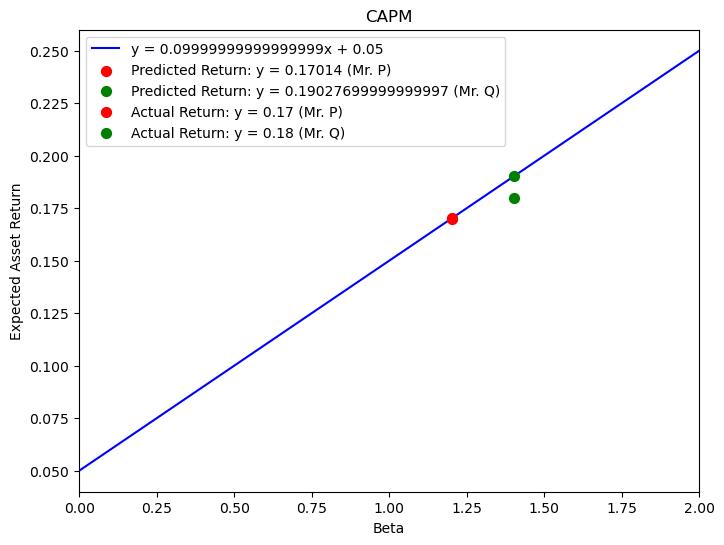

In [4]:
# Question B1 & B2 Coding Portion

r_rf = 0.05
r_m = 0.15

slope = r_m - r_rf
intercept = r_rf

def CAPM(x):
  return slope * x + intercept

p_beta = 1.2014
p_return = CAPM(p_beta)

q_beta = 1.40277
q_return = CAPM(q_beta)

p_rreturn = .17
q_rreturn = .18

x = np.linspace(0, 2, 100)
y = CAPM(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, label=f"y = {slope}x + {intercept}", color='blue')
plt.scatter(p_beta, p_return, color='red', marker="o", s=50, label=f'Predicted Return: y = {p_return} (Mr. P)', zorder=3)
plt.scatter(q_beta, q_return, color='green', marker="o", s=50, label=f'Predicted Return: y = {q_return} (Mr. Q)', zorder=3)

plt.scatter(p_beta, p_rreturn, color='red', marker="o", s=50, label=f'Actual Return: y = {p_rreturn} (Mr. P)', zorder=3)
plt.scatter(q_beta, q_rreturn, color='green', marker="o", s=50, label=f'Actual Return: y = {q_rreturn} (Mr. Q)', zorder=3)

plt.xlabel("Beta")
plt.xlim(0, 2)
plt.ylabel("Expected Asset Return")
plt.title("CAPM")
plt.legend()
plt.show()

### Question B2 Written Portion

Mr. P essentially matches the market since underperformance by .00014 is reasonably negligible, so it is reasonable to say that he is not underperforming the market. The small negative alpha could be fees to manage an index fund, or something similar. On the other hand, Mr. Q is underperforming by ~0.1, which is substaintially below the prediction by the CAPM.

### Question B3 Written Portion

See the handwritten portion above

## Section C

In [5]:
# Question C Coding Portion

df_returns = pd.read_excel("../data/STOCKS.xlsx")

df_returns.columns = df_returns.iloc[0]
df_returns = df_returns[1:]
df_returns.reset_index(drop=True, inplace=True)
df_returns["DATE"] = pd.to_datetime(df_returns["DATE"])

df_returns = df_returns.set_index("DATE")
df_returns = df_returns.apply(pd.to_numeric, errors="coerce")

def market_model(asset):
  df_asset = pd.DataFrame(index = df_returns.index)
  df_asset["Excess Asset Returns"] = df_returns[asset] - df_returns["TBILL"]    
  df_asset["Excess_Market_Returns"] = df_returns["S&P500D"] - df_returns["TBILL"]
  return df_asset     

tickers = ["AEP", "KMB", "BMY", "XOM", "IBM"]
results = []
for t in tickers:
    df_stock = market_model(t)
    
    X = sm.add_constant(df_stock["Excess_Market_Returns"])
    y = df_stock["Excess Asset Returns"]
    
    model = sm.OLS(y, X, missing="drop").fit()
    
    p_alpha0 = float(model.pvalues["const"])
    t_beta1 = model.t_test("Excess_Market_Returns")
    p_beta1 = float(t_beta1.pvalue)
    
    results.append({
        "Stock": t,
        "Alpha": model.params["const"],
        "Beta": model.params["Excess_Market_Returns"],
        "R²": model.rsquared,
        "p(Alpha=0)": p_alpha0,
        "p(Beta=1)": p_beta1
    })

In [6]:
# Question C1 Summary

df_summary = pd.DataFrame(results)
df_summary = df_summary.set_index("Stock")
print(df_summary.round(4))

        Alpha    Beta      R²  p(Alpha=0)  p(Beta=1)
Stock                                               
AEP    0.0021  0.5215  0.1673      0.2512        0.0
KMB    0.0001  0.6972  0.2416      0.9643        0.0
BMY    0.0036  0.8593  0.2904      0.0887        0.0
XOM    0.0025  0.7151  0.3349      0.1142        0.0
IBM    0.0001  0.9732  0.3667      0.9461        0.0


### Question C1 Written Portion

Yes, based on the p-values that are < 0.05 by many magnitudes, the betas' are statistically different from 1 and we reject the null hypothesis. The betas are measured to a degree of confidence at .95, such that the calculated confidence interval would most likely contain the true beta. However, the precise value shown as the estimated beta may not be accurate but indicates the center of the confidence interval and a reasonable value.

### Question C2 Written Portion

The $R^2$'s of each stock are listed above as well, and indicate the proportion of the total variance that is explained by systematic risk. The proportion $1-R^2$ is the portion unexplained, indicating idiosyncratic risk of the asset itself that is able to be diversified away.

In [7]:
# Question C3 Coding Portion

df_residuals = pd.DataFrame(index=df_returns.index)

for t in tickers:
    df_stock = market_model(t)
    df_residuals[t] = df_stock["Excess Asset Returns"] - df_summary["Alpha"][t] - df_summary["Beta"][t] * df_stock["Excess_Market_Returns"]

residual_corr = df_residuals.corr()
print(residual_corr)

          AEP       KMB       BMY       XOM       IBM
AEP  1.000000  0.188016  0.084447  0.094581 -0.143131
KMB  0.188016  1.000000  0.164002 -0.025664 -0.060547
BMY  0.084447  0.164002  1.000000 -0.033548 -0.004296
XOM  0.094581 -0.025664 -0.033548  1.000000 -0.025144
IBM -0.143131 -0.060547 -0.004296 -0.025144  1.000000


### Question C3 Written Portion

The off-diagonal terms in the residual correlation matrix $R_{\hat{\epsilon}}$ should ideally be close to zero, which would validate the assumption in the Market Model (and CAPM) that idiosyncratic risks (represented by the residuals $\hat{\epsilon}_{it}$) are uncorrelated across different stocks. If they are significantly non-zero, it suggests the Market Model is incomplete, as a common, unmodeled factor is driving the firm-specific risks. Based on the off-diagonals, it seems not to be an issue in terms of significant correlations, but even low correlations show that the assumption isn't super accurate.

This correlation is crucial for investments because the residuals ($\hat{\epsilon}_{it}$) account for the unsystematic risk since higher positive correlation between residuals limits the benefits of diversification. While diversification can effectively eliminate independent unsystematic risk, it cannot eliminate unsystematic risk that is correlated. Therefore, higher residual correlation means the portfolio remains exposed to more risk that should theoretically be diversifiable.

### Question C4 Written Portion

No, based on the p-values that are consistently above > 0.05 for all of the stocks, we fail to reject the null hypothesis. Hence it seems that finding true alpha is quite difficult, whilst betas are must easier to estimate. Based on the difficulty of industry professionals to beat the market, this result is intuitive.

### <u>*Statement of Collaboration (including ChatGPT)*</u>

I collaborated with **Theodore Ouyang**. Additionally, **ChatGPT** was used to debug any error-prone code and find the proper Excel-equivalent Python functions and libraries to properly execute the solutions to the problems, in conjunction with the hints listed on the problem set.

### <u>*Honor Code*</u>
This assignment: represents my own work in accordance with University regulations and class policy.